<a href="https://colab.research.google.com/github/mmadduri/BMI_Model/blob/brainAdaptOnly/Winter2020_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Start with this:**

Run the (***simple random search***) iteration

$$ u^+ = u - \frac{\gamma}{N} \sum_{n = 1}^N ( c(u + u_n) - c(u) ) \cdot u_n,\ u_n \sim \mathcal{N}(u,\sigma^2) $$

In our case, the cost function is just the reach error -- calculated by the reach error between the previous lamdba values and the current one. 


Error is defined as reach error: $ error = ||t-y||^2 $ and the perturbation term $ p_{2k+1} $ can be thought of a normal distribution.

$$ \lambda^+ = \lambda - \frac{\nu}{N\delta} \sum_{n = 1}^N ( error(\lambda + \delta p) - error(\lambda) ) \cdot  p, p \sim \mathcal{N}(\lambda,\sigma^2) $$

$$ u^+ = u - \frac{\gamma}{N} \sum_{n = 1}^N ( c(u + u_n) - c(u) ) \cdot u_n,\ u_n \sim \mathcal{N}(u,\sigma^2) $$

---



# Testing gradient descent + stochastic update functions

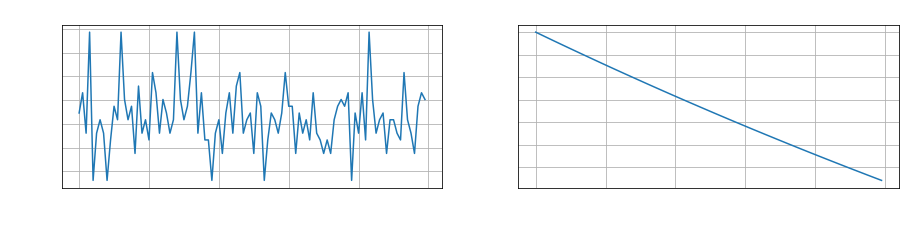

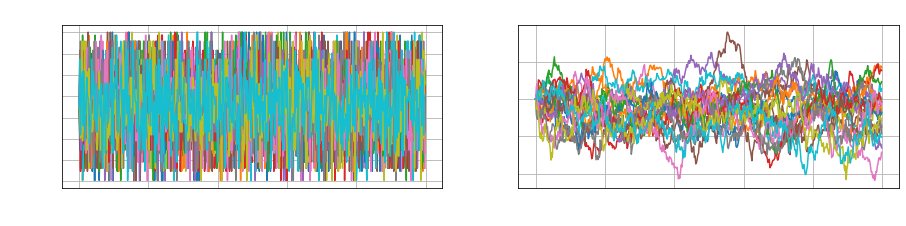

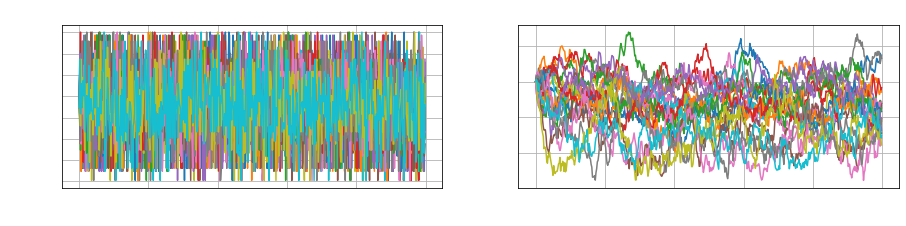

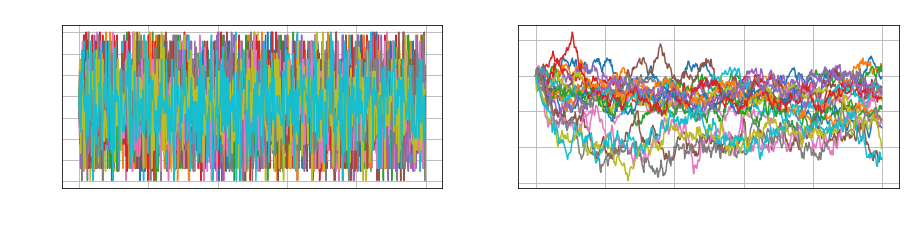

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

def cost(u): 
  return ((u**6)/6) - (7/5 * u**5) + (17/4 * u**4) - (17/3 * u**3) + (3 * u**2)
def D1_c(u): 
  return derivative(cost, u, dx=0.0001)
def D2_c(u): 
  return derivative(D1_c, u, dx=0.0001)

#define gradient descent 
def gradDesc_cont(rate, it_num, u_init):
  u_descent = np.zeros((it_num))
  c_descent = np.zeros((it_num))
  u_descent[0] = u_init
  c_descent[0] = cost(u_descent[0])
  
  for iT in range(it_num-1):
    u_new = u_descent[iT] - rate*D1_c(u_descent[iT])
    u_descent[iT+1] = u_new
    c_descent[iT+1] = cost(u_new)  

  # Load display stuff
  figsize = (fig_x, fig_y)
  plt.figure(figsize=figsize)

  # Draw results
  ax1 = plt.subplot(1,2,1); ax1.grid('on')
  ax1.plot(range(it_num), c_descent)
  ax1.set_ylabel('$c(u)$', color='white')
  ax1.set_xlabel('iteration', color='white')
  ax1.tick_params(axis='x', colors='white')
  ax1.tick_params(axis='y', colors='white')
  ax1.set_title('Experiment '+str(1)+' ($\gamma$='+str(rate)+', initial $u$='+str(u_descent[0])+')', color='white')

  ax2 = plt.subplot(1,2,2); ax2.grid('on')
  ax2.plot(range(it_num),u_descent)
  ax2.set_ylabel('$u$', color='white')
  ax2.set_xlabel('iteration', color='white')
  ax2.tick_params(axis='x', colors='white')
  ax2.tick_params(axis='y', colors='white')
  ax2.set_title('Result: min $c(u)$= '+str("%0.2f" % c_descent[it_num-1])+', where $u$= '+str("%0.2f" % u_descent[it_num-1]), color='white')

######
N = 100

def d_gauss(u,sigma,delta): 
  un = np.random.normal(u, sigma, N)
  c_exp = 0
  for i in range(N):
    c_exp = c_exp + (cost(u+delta*un[i]) - cost(u))*un[i]
  c_exp = c_exp/(N*delta)
  return c_exp

def gradDesc_testGauss(rate, it_num, u_init, sigma, delta):
  u_descent = np.zeros((it_num))
  c_descent = np.zeros((it_num))
  u_descent[0] = u_init
  c_descent[0] = cost(u_descent[0])
  for iT in range(it_num-1):
    u_plus = u_descent[iT] - rate*d_gauss(u_descent[iT],sigma,delta)
    u_descent[iT+1] = u_plus
    c_descent[iT+1] = cost(u_plus)

  # Load display stuff
  figsize = ( fig_x, fig_y)
  plt.figure(figsize=figsize)

  # Draw results
  ax1 = plt.subplot(1,2,1); ax1.grid('on')
  ax1.plot(range(it_num),c_descent)
  ax1.set_ylabel('$c(u)$', color='white')
  ax1.set_xlabel('iteration', color='white')
  ax1.tick_params(axis='x', colors='white')
  ax1.tick_params(axis='y', colors='white')
  ax1.set_title('Experiment '+ str(2)+' ($\gamma$='+ str(rate) +', initial $u$='+ str(u_descent[0]) +', $\Delta$='+ str(delta)+')', color='white')


  ax2 = plt.subplot(1,2,2); ax2.grid('on')
  ax2.plot(range(it_num),u_descent)
  ax2.set_ylabel('$u$', color='white')
  ax2.set_xlabel('iteration', color='white')
  ax2.tick_params(axis='x', colors='white')
  ax2.tick_params(axis='y', colors='white')
  ax2.set_title('Result: min $c(u)$= '+str("%0.2f" % c_descent[it_num-1])+', where $u$= '+str("%0.2f" % u_descent[it_num-1]), color='white')

########
def findErrorGrad_test(test_input, sigma, delta, N_samp):
  N_sum = 0
  perturb_rand = np.random.normal(test_input, sigma, N_samp) 

  for iN in range(N_samp):
    # print("perturb rand = " + str(perturb_rand[iN]))
    error_perturb = cost(test_input + delta*perturb_rand[iN])
    error_input = cost(test_input - delta*perturb_rand[iN])
    N_sum = N_sum + (error_perturb - error_input)*(perturb_rand[iN])

  errorGrad = N_sum/(N_samp*2*delta)
  return errorGrad


def gradDesc_testED(rate, it_num, u_init, sigma_list, delta, dist_samp):

  # Load display stuff
  figsize = (fig_x , fig_y)
  plt.figure(figsize=figsize)
  ax1 = plt.subplot(1,2,1); ax1.grid('on')
  ax2 = plt.subplot(1,2,2); ax2.grid('on')
  runs_num = 5

  for sigma in sigma_list:
    for iR in range(runs_num):
      u_new = [u_init]
      c_new = [cost(u_new[-1])]
      grad_new = np.zeros(it_num)
      grad_new[0] = findErrorGrad_test(u_new[-1], sigma, delta, dist_samp)
      for iT in range(it_num-1):
        u_new.append(u_new[-1] - rate*grad_new[iT])
        c_new.append(cost(u_new[-1]))
        grad_new[iT+1] = findErrorGrad_test(u_new[-1], sigma , delta, dist_samp) 
      ax1.plot(range(it_num), c_new, label="$\sigma$="+"%0.6f" % sigma)
      ax2.plot(range(it_num), u_new, label="$\sigma$="+"%0.6f" % sigma)

  # Draw results
  # ax1.plot(range(it_num),c_new)
  ax1.set_ylabel('$c(u)$', color='white')
  ax1.set_xlabel('iteration', color='white')
  ax1.tick_params(axis='x', colors='white')
  ax1.tick_params(axis='y', colors='white')
  ax1.set_title('Experiment '+ str(3) +' ($\gamma$='+str(rate)+', initial $u$='+str(u_new[0])+', N ='+str(dist_samp) +', $\Delta$='+str(delta)+ ')', color='white')

  # ax2.plot(range(it_num),u_new)
  ax2.set_ylabel('$u$', color='white')
  ax2.set_xlabel('iteration', color='white')
  ax2.tick_params(axis='x', colors='white')
  ax2.tick_params(axis='y', colors='white')
  ax2.set_title('Result: min $c(u)$= '+ str("%0.2f" % c_new[it_num-1])+', where $u$= '+str("%0.2f" % u_new[it_num-1]), color='white')

  
######## TESTING ONLY
rate = 2e-4
u_init = 3
numIter = 100
fig_x = 15
fig_y = 3

# rate = r_list[exp]
gradDesc_cont(rate, numIter, u_init)

sigma_list = [1e-4, 1, 1.5, 3]
delta = 1e-6
numIter = 500
dist_samp_list = [10, 50, 100]
for dist_samp in dist_samp_list:
  gradDesc_testED(rate, numIter, u_init, sigma_list, delta, dist_samp)



# SDE with perturbing the firing rate 

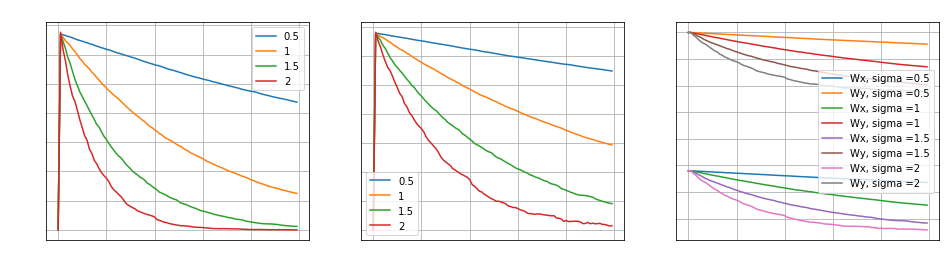

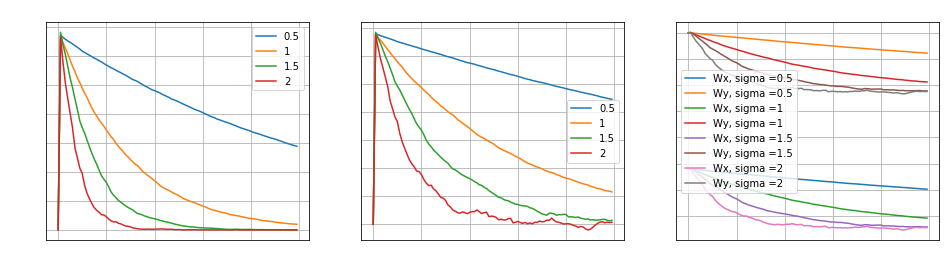

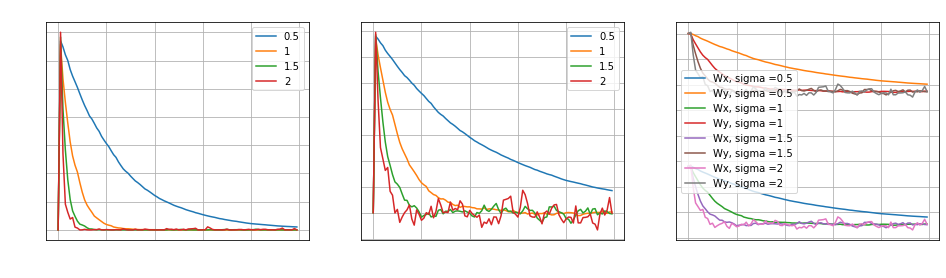

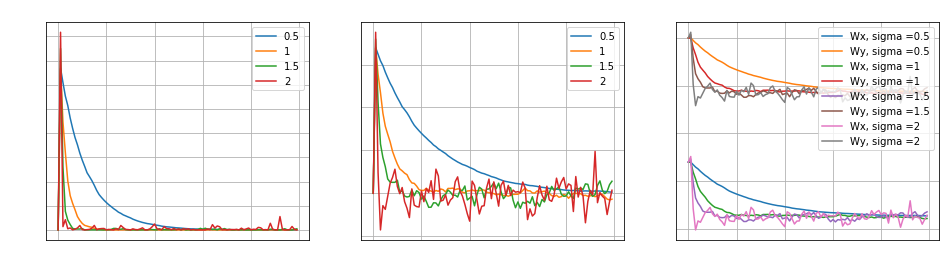

In [0]:
import numpy as np
import matplotlib.pyplot as plt


## Set some initial conditions here
BASELINE = 5
lambda_init = np.array([BASELINE, 0.4, 3])
TARGET_VECTOR = [1, 1]

K_MATX = np.array([[0.5, 0.2]])
A_VECT = TARGET_VECTOR - K_MATX*BASELINE

# Function that generates the adaptation

####################
# Brain Model 
def calcNextLambda(lambda_vect, gamma, delta_perturb, targ_vect):
  # This is the vector to multiply the lambda update term with = [1 t_x t_y]'
  targ_vect_mult = np.insert(targ_vect.copy(), 0, 1)
  next_term = (gamma*delta_perturb*targ_vect_mult)
  # print("next term = " + str(next_term))
  lambda_vect_new = lambda_vect.copy() - (next_term)
  # print("lambda new = " + str(lambda_vect_new))
  return lambda_vect_new

## lambda, t --> f
def brainFiringRate(lambda_vect, targ_vect):
  # f = b + Fwt 
  # [b w_x w_y]*[1 t_x  t_y ]'
  targ_vect_mult = np.insert(targ_vect.copy(), 0, 1)
  newFR = np.matmul(lambda_vect, targ_vect_mult) 
  return newFR

####################
# Decoder Model 
# K_matx = num neurons x num target 

def findDecoderParam():
  K_matx = np.array([[0.5, 0.2]])
  targ_vect = TARGET_VECTOR
  a_vect = targ_vect - K_matx*baseline
  return (a_vect, K_matx)


# keyword arguments--like a static variable (add states to function)
# make it's optional argument (kwargs)
# might have to make neurons_num global
# firing rate --> a + Kf --> y
## f --> y
def decoder_findY(firing_rate, targ_vect):

  # a_vect, K_matx = findDecoderParam()
  # D(f) = a + Kf = y
  # Start with affine decoder
  nextPred_vect = A_VECT + np.dot(K_MATX, np.squeeze(np.asarray(firing_rate)))
  return (nextPred_vect)

####################
# Reach error

# y_x, y_y = matrix of predicted cursor position
# t_x, t_y = matrix of target position
def calcReachError(y_vect, t_vect):
  norm_vect = np.array(y_vect) - np.array(t_vect)
  return (np.linalg.norm(norm_vect, 2)**2)

def reachError_FR(firing_rate, targ_vect):
  y_vect = decoder_findY(firing_rate, targ_vect)
  t_vect = targ_vect
  return calcReachError(y_vect, t_vect)  

#########
## Related to Stochastic Gradient Descent

# this is only 1 iteration of SGD
# takes in a vector lambda 
# start with scalar case
def findErrorGrad_fr(fr_input, sigma, delta, targ_vect, N_samp):
  N_sum = 0
  # perturb_rand = np.random.normal(0, sigma, N_samp) + fr_input
  perturb_rand = np.random.normal(0, sigma, N_samp) 
  for iN in range(N_samp):
    # print("perturb rand = " + str(perturb_rand[iN]))
    error_perturb = reachError_FR(fr_input + delta*perturb_rand[iN], targ_vect)
    error_input = reachError_FR(fr_input, targ_vect)
    N_sum = N_sum + (error_perturb - error_input)*(perturb_rand[iN])

  errorGrad = N_sum/(N_samp*delta)
  return errorGrad


# param vect = what to update 
def gradDesc_fr(fr_init, lambda_init, targ_vect, learn_rate, numIter, sigma_list, delta, dist_samp):

  # Load display stuff
  figsize = (fig_x , fig_y)
  plt.figure(figsize=figsize)
  ax1 = plt.subplot(1,3,1); ax1.grid('on')
  ax2 = plt.subplot(1,3,2); ax2.grid('on')
  ax3 = plt.subplot(1,3,3); ax3.grid('on')
  runs_num = 1

  fr_final = np.zeros(runs_num)
  re_final = np.zeros(runs_num)

  for sigma in sigma_list:
    for iR in range(runs_num):
      # Set the u vectors
      fr_vect = np.zeros(numIter)
      fr_next = np.array(fr_init)
      fr_vect[0] = np.array(fr_next)

      lambda_vect = np.zeros((np.size(lambda_init), numIter))
      lambda_vect[:,0] = lambda_init

      # set the cost vector
      err_vect = np.zeros(numIter)
      err_next = reachError_FR(fr_init, targ_vect)
      err_vect[0] = np.array(err_next)
      # print('initial error = ' + str(err_next))

      grad_new = np.zeros(numIter)
      # calculate the initial delta e
      grad_new[0] = findErrorGrad_fr(fr_init, sigma, delta, targ_vect, dist_samp)
      # print('initial grad = ' + str(grad_new[0]))


      for iT in range(numIter-1):
        ## calculate the new u 
        # (1) lambda+ = lambda - learn_rate*grad_error
        lambda_next = calcNextLambda(lambda_vect[:, iT], learn_rate, grad_new[iT], targ_vect)
        lambda_vect[:, iT+1] = lambda_next
        # print("grad = " + str(grad_new[iT]))
        # print('lambda = ' + str(lambda_next))


        # (2) fr+ = B(lambda+)
        fr_next = brainFiringRate(lambda_next, targ_vect)
        fr_vect[iT+1] = fr_next


        ## calculate the new cost
        # (3) Calculate the new reach error 
        err_next = np.array(reachError_FR(fr_next, targ_vect))  
        err_vect[iT+1] = err_next
        # print('error = ' + str(err_next))

        ## calculate the next error descent term
        grad_new[iT+1] = findErrorGrad_fr(fr_next, sigma, delta, targ_vect, dist_samp)

      fr_final[iR] = fr_next
      re_final[iR] = err_next
      ax1.plot(range(numIter), err_vect, label=sigma)
      ax2.plot(range(numIter), fr_vect, label=sigma)
      # ax3.plot(range(numIter), lambda_vect[0, :], label = 'b') 
      ax3.plot(range(numIter), lambda_vect[1, :], label = 'Wx, sigma =' + str(sigma)) 
      ax3.plot(range(numIter), lambda_vect[2, :], label = 'Wy, sigma =' + str(sigma))


    # Draw results
    # ax1.plot(range(it_num),c_new)
    ax1.set_ylabel('$RE$', color='white')
    ax1.set_xlabel('iteration', color='white')
    ax1.tick_params(axis='x', colors='white')
    ax1.tick_params(axis='y', colors='white')
    ax1.set_title('RE' + ' N = ' + str(dist_samp) + ' Rate = ' + str(learn_rate), color='white')
    ax1.legend()

    # ax2.plot(range(it_num),u_new)
    ax2.set_ylabel('$FR$', color='white')
    ax2.set_xlabel('iteration', color='white')
    ax2.tick_params(axis='x', colors='white')
    ax2.tick_params(axis='y', colors='white')
    ax2.set_title('FR', color='white')
    ax2.legend()


    ax3.set_ylabel('$lambda$', color='white')
    ax3.set_xlabel('iteration', color='white')
    ax3.tick_params(axis='x', colors='white')
    ax3.tick_params(axis='y', colors='white')
    ax3.set_title('Lambda', color='white')
    ax3.legend()


########
# # Set initial conditions
rate_list = [5e-3, 1e-2, 5e-2, 1e-1]
fr_init = [BASELINE]
numIter = 100
fig_x = 16
fig_y = 4

sigma_list = [0.5, 1, 1.5, 2]
delta = 1
dist_samp_list = [100]
for rate in rate_list:
  for dist_samp in dist_samp_list:
    gradDesc_fr(fr_init, lambda_init, TARGET_VECTOR, rate, numIter, sigma_list, delta, dist_samp)

# ########
# NEW_BL = 4.7
# A_VECT = TARGET_VECTOR - K_MATX*NEW_BL
# numIter = 100
# for dist_samp in dist_samp_list:
#   gradDesc_fr(fr_init, lambda_init, TARGET_VECTOR, rate, numIter, sigma_list, delta, dist_samp)




# WIP (Using Lambda to generate perturbations)

[[0.4  0.25]]
5.6225000000000005
0.2225


<Figure size 432x288 with 0 Axes>

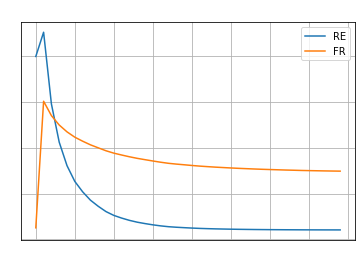

<Figure size 432x288 with 0 Axes>

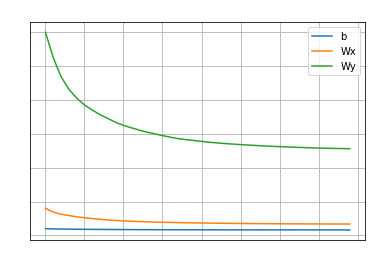

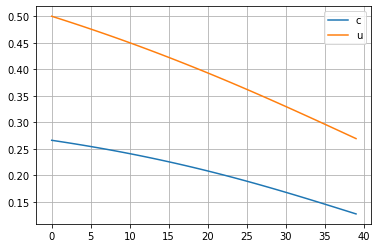

In [0]:
import numpy as np
import matplotlib.pyplot as plt


# Function that generates the adaptation

####################
# Brain Model 
def calcNextLambda_element(lambda_vect, gamma, delta_perturb, targ_vect):
  # This is the vector to multiply the lambda update term with = [1 t_x t_y]'
  targ_vect_mult = np.insert(targ_vect, 0, 1)
  return lambda_vect - (gamma*np.multiply(delta_perturb, targ_vect_mult))

## lambda, t --> f
def brainFiringRate(lambda_vect, targ_vect):
  # f = b + Fwt 
  # [b w_x w_y]*[1 t_x  t_y ]'
  targ_vect_mult = np.insert(targ_vect.copy(), 0, 1)
  newFR = np.matmul(lambda_vect, targ_vect_mult) 
  return newFR

####################
# Decoder Model 
# K_matx = num neurons x num target 
K_matx = np.array([[0.5, 0.2]])

# keyword arguments--like a static variable (add states to function)
# make it's optional argument (kwargs)
# might have to make neurons_num global
# firing rate --> a + Kf --> y
## f --> y
def decoder_findY(firing_rate, targ_vect):
  global K_matx
  # D(f) = a + Kf = y
  # Start with affine decoder
  a_vect = np.multiply(firing_rate, 0.3)

  nextPred_vect = a_vect + np.dot(K_matx, np.squeeze(np.asarray(firing_rate)))
  return (nextPred_vect)

# Note to self: this function is returning a + Kf = y accurately

####################
# Reach error

# y_x, y_y = matrix of predicted cursor position
# t_x, t_y = matrix of target position
def calcReachError(y_vect, t_vect):
  norm_vect = np.array(y_vect) - np.array(t_vect)
  return (np.linalg.norm(norm_vect, 2)**2)

def reachError_FR(firing_rate, targ_vect):
  y_vect = decoder_findY(firing_rate, targ_vect)
  t_vect = targ_vect
  return calcReachError(y_vect, t_vect)  

#########

# this is only 1 iteration of SGD
# takes in a vector lambda 
# start with scalar case
def findErrorGrad_lambda(lambda_input, sigma, delta, targ_vect):
  N_samp = 100
  lambda_size = np.size(lambda_input)
  errorGrad = np.zeros(lambda_size)
  lambda_perturb = np.zeros(lambda_size)
  perturb_rand = np.zeros(( lambda_size, N_samp ))

  for iL in range(lambda_size): 
    perturb_rand[iL, :] = np.random.normal(lambda_input[iL], sigma, N_samp) 
    N_sum = 0
    for iN in range(N_samp):
      # find lambda = lambda + p ~ N(0, o^2)
      lambda_perturb = lambda_input.copy()
      lambda_perturb[iL] = delta*perturb_rand[iL, iN]

      # find the delta error due to perturbation
      error_perturb = calcReachError(decoder_findY(brainFiringRate(lambda_perturb, targ_vect), targ_vect), targ_vect)
      error_input = calcReachError(decoder_findY(brainFiringRate(lambda_input, targ_vect), targ_vect), targ_vect)

      # keep track of the running sum
      N_sum = N_sum + (np.abs( error_perturb - error_input ))*perturb_rand[iL, iN]  
    errorGrad[iL] = N_sum/(N_samp*delta)
  
  # print(np.shape(errorGrad))
  return errorGrad


def gradDesc_lambda(fr_init, lambda_init, targ_vect, learn_rate, numIter, sigma, delta):
  lambda_vect = np.zeros((np.size(lambda_init), numIter))
  lambda_vect[:,0] = lambda_init

  fr_vect = np.zeros(numIter)
  fr_next = np.array(fr_init)
  fr_vect[0] = np.array(fr_next)


  err_vect = np.zeros(numIter)
  err_next = reachError_FR(fr_vect[-1], targ_vect)
  err_vect[0] = np.array(err_next)
  
  for iT in range(0, numIter-1, 1):
    # delta_perturb = \Delta_feedback term due to perturbation
    delta_perturb = findErrorGrad_lambda(lambda_vect[:, iT], sigma, delta, targ_vect)
    # print("delta perturb = " + str(delta_perturb))
    
    # lambda+ = lambda - learn_rate*delta_perturb
    lambda_next = calcNextLambda_element(lambda_vect[:, iT], learn_rate, delta_perturb, targ_vect)
    # print("next lambda = " + str(lambda_next))

    # # calculate new firing rate with lamdba+
    fr_next = np.abs(brainFiringRate(lambda_next, targ_vect)) 
    # print("fr_next = " + str(fr_next))

    # calculate new reach error with lamdba+ and fr+
    err_next = np.array(reachError_FR(fr_next, targ_vect))  
    # print("error next = " + str(err_next))


    # update vectors 
    fr_vect[iT+1] = fr_next
    err_vect[iT+1] = err_next
    lambda_vect[:, iT+1] = lambda_next


  it_idx = np.linspace(0, numIter, numIter, endpoint=False) 
  plt.figure()
  fig, ax = plt.subplots()

  ax.plot(it_idx, err_vect, label = 'RE')
  ax.plot(it_idx, fr_vect, label = 'FR') 
  ax.tick_params(axis='x', colors='white')
  ax.tick_params(axis='y', colors='white')
  leg = ax.legend();
  plt.grid()
  plt.title('Stoch Update', color='white')
  
  

  plt.figure()
  fig2, ax2 = plt.subplots()
  ax2.plot(it_idx, lambda_vect[0, :], label = 'b') 
  ax2.plot(it_idx, lambda_vect[1, :], label = 'Wx') 
  ax2.plot(it_idx, lambda_vect[2, :], label = 'Wy')
  ax2.tick_params(axis='x', colors='white')
  ax2.tick_params(axis='y', colors='white')


  leg = ax2.legend();
  plt.grid()
  plt.title('Stoch Update of Lambda', color='white')





# param vect = what to update 
#### Code

##### TESTING ONLY
# define c, D1_c, D2_c
def cost(u):
  return ((u**6)/6) - (7/5 * u**5) + (17/4 * u**4) - (17/3 * u**3) + (3 * u**2)
def D1_c(u):
  return ((u**5) - (7 * u**4) + (17 * u**3) - (17 * u**2) + (6 * u**1))
def D2_c(u):
  return ((5 * u**4) - (7*4 * u** 3) + (17*3 * u**2) - (17*2 * u) + (6))

#define gradient descent 
def gradDesc_cont(rate, it_num, u_init):
  u_new = [u_init]
  c_new = [cost(u_new[-1])]
  for it in range(1,it_num,1):
    u_new.append(u_new[-1] - rate*D1_c(u_new[-1]))
    c_new.append(cost(u_new[-1]))
  it_idx = np.linspace(0,it_num, it_num, endpoint=False) 
  plt.figure()
  plt.plot(it_idx, c_new)
  plt.plot(it_idx, u_new)

# # Set initial conditions

# #######
# Set initial conditions
learn_rate = 0.5
numIter = 40
fr_init = [0.5]
lambda_init = np.array([0.1, 0.4, 3])
sigma = 0.01 # Note about sigma: Anything >0.1 does not converge
delta = 1

TARGET_NUM = 2
TARGET_VECTOR = [2, 2]
gradDesc_lambda(fr_init, lambda_init, TARGET_VECTOR, learn_rate, numIter, sigma, delta)

##

# print(findErrorGrad_lambda(lambda_init, sigma, delta, TARGET_VECTOR))

#### TESTING ONLY
rate = sigma
u_init = 0.5
gradDesc_cont(rate, numIter, u_init)
plt.legend({'c', 'u'})
plt.grid()

e1 = decoder_findY(u_init, TARGET_VECTOR)
print(e1)
print(reachError_FR(u_init, TARGET_VECTOR))
print(np.linalg.norm(e1, 2)**2)


# Now trying SDE with multiple neurons (IN PROGRESS)

initial lambda = [[ 5.   0.4  3. ]
 [10.   0.6  5. ]
 [15.   1.   4. ]
 [20.   2.   2. ]]
starting fr vect = [[ 5.]
 [10.]
 [15.]
 [20.]]
FR = [[ 2.703364  ]
 [11.29710455]
 [19.09141649]
 [17.66250351]]
diff in FR = [[-2.296636  ]
 [ 1.29710455]
 [ 4.09141649]
 [-2.33749649]]
final lambda = [[[ 4.13595457]
  [-1.32809086]
  [ 0.40786371]]

 [[ 8.93550747]
  [-1.52898506]
  [ 1.8065224 ]]

 [[14.29224403]
  [-0.41551193]
  [ 1.8767321 ]]

 [[19.11875025]
  [ 0.2375005 ]
  [-0.64374925]]]
RE = [0.0245557]
starting fr vect = [[ 5.]
 [10.]
 [15.]
 [20.]]
FR = [[ 2.10610129]
 [13.88541803]
 [18.80707161]
 [16.08880898]]
diff in FR = [[-2.89389871]
 [ 3.88541803]
 [ 3.80707161]
 [-3.91119102]]
final lambda = [[[ 4.09329295e+00]
  [-1.41341410e+00]
  [ 2.79878848e-01]]

 [[ 9.12038700e+00]
  [-1.15922600e+00]
  [ 2.36116101e+00]]

 [[ 1.42719337e+01]
  [-4.56132627e-01]
  [ 1.81580106e+00]]

 [[ 1.90063435e+01]
  [ 1.26869972e-02]
  [-9.80969504e-01]]]
RE = [0.6798116]
starting fr vect = [[ 

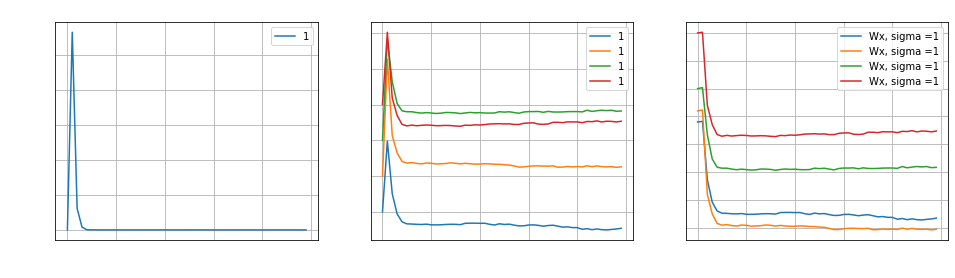

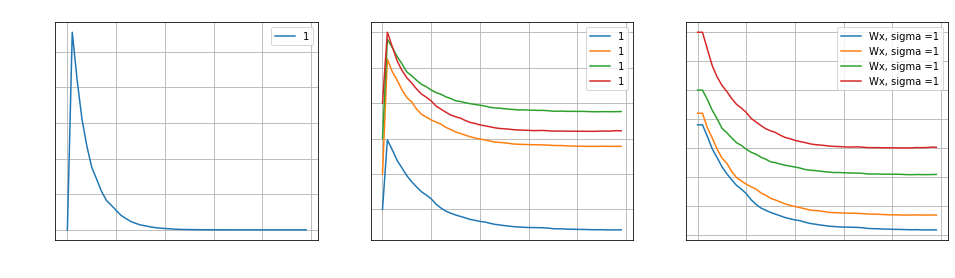

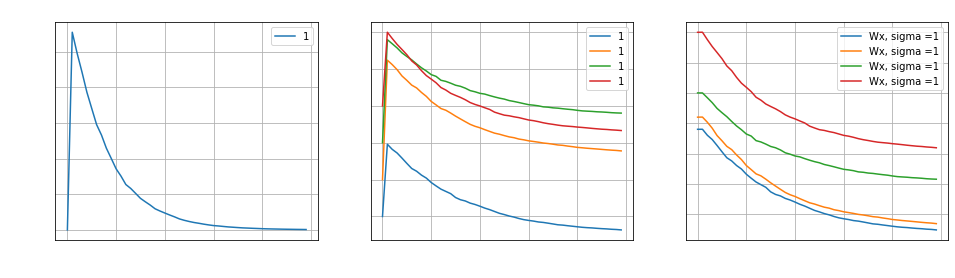

In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt



####################
# Brain Model 
# Function that generates the adaptation

## INPUT
# lambda_vect = N x 3
# delta_perturb = N x 1
# targ_vect = 2 x 1
## MIDDLE
# targ_vect_mult = 3 x 1 [1 t_x t_y]'
# targ_matx = N x 3
# delta_matx = N x 3
# next_tarm = delta_matx*delta_matx (element-wise mult) = N x 3
## OUTPUT
# lambda_vect_new = N x 3
def calcNextLambda(lambda_vect, gamma, delta_perturb, targ_vect):
  # This is the vector to multiply the lambda update term with = [1 t_x t_y]'
  num_neurons = np.size(lambda_vect.copy(), 0)
  targ_vect_mult = np.insert(targ_vect.copy(), 0, 1) # 3 x 1  
  # print("targ vect shape = " + str(np.shape(targ_vect_mult)))
  # print("targ vect mult = " + str(targ_vect_mult)) 

  targ_matx = (np.matlib.repmat(targ_vect_mult, num_neurons, 1)) # N x 3
  # print("targ_matx shape = " + str(np.shape(targ_matx)))
  # print("targ_matx = " + str(targ_matx))
  
  # next gradient term: \gamma*delta_perturb
  delta_matx = np.matlib.repmat(delta_perturb, 1, 3) # N x 3
  # print("delta_matx shape = " + str(np.shape(delta_matx)))
  # print("delta_matx = " + str(delta_matx))

  next_term = (delta_matx*targ_matx) # 3 x N
  # print("next_term shape = " + str(np.shape(next_term)))
  # print("next_term = " + str(next_term))

  lambda_vect_new = lambda_vect.copy() - (gamma*next_term)
  return lambda_vect_new

## lambda, t --> f

## INPUT
# lambda_vect = N x 3
# targ_vect = 2 x 1
## OUTPUT
# newFR = N x 1
def brainFiringRate(lambda_vect, targ_vect):
  # f = b + Fwt 
  targ_vect_mult = np.insert(targ_vect.copy(), 0, 1)
  newFR = np.matmul(lambda_vect, targ_vect_mult)
  return newFR

####################
# Decoder Model 

## firing rate --> a + Kf --> y
# K_matx = num neurons x num target 

def decoder_findY(firing_rate, targ_vect):
  # Start with affine decoder
  nextPred_vect = A_VECT + np.dot(K_MATX, np.squeeze(np.asarray(firing_rate)))
  return (nextPred_vect)

####################
# Reach error

# y_x, y_y = matrix of predicted cursor position
# t_x, t_y = matrix of target position
def calcReachError(y_vect, t_vect):
  norm_vect = np.array(y_vect) - np.array(t_vect)
  return (np.linalg.norm(norm_vect, 2)**2)

## INPUT
# firing rate = vector  (N x 1)
## OUTPUT
# reach error = scalar
def reachError_FR(firing_rate, targ_vect):
  y_vect = decoder_findY(firing_rate, targ_vect)
  t_vect = targ_vect
  return calcReachError(y_vect, t_vect)  

#########
## Related to Stochastic Gradient Descent
# NOTE 03/18/20: Checked that this function returned the correct variables for N = 1 and N = 3

## INPUT
# this is only 1 iteration of SGD
# takes in vector fr_input [ N x 1]
## OUTPUT
# errorGrad = [N x 1]
def findErrorGrad_fr(fr_input, sigma, delta, targ_vect, dist_num):
  # initialize vectors
  N_neurons = np.size(fr_input, 0)
  matx_sum = np.zeros((N_neurons, 1)) # matx_sum = N x 1
  errorGrad = np.zeros((N_neurons, 1))
  perturb_rand = np.zeros((N_neurons, dist_num))
  fr_input = fr_input.copy().reshape(N_neurons, 1)

  for iN in range(N_neurons):
    perturb_rand[iN, :] = np.random.normal(0, sigma, dist_num) 
    # perturb_rand = N x d
    # for each iteration, np.random.normal returns a 100x1 array

  for iD in range(dist_num):
    perturb_vect = np.zeros((N_neurons, 1))
    perturb_vect = perturb_rand[:, [iD]]

    # error_perturb and error_input should always be scalar values
    
    error_perturb = reachError_FR(np.add(fr_input, delta*perturb_vect), targ_vect)
    # print("error_perturb = " + str(error_perturb))

    error_input = reachError_FR(fr_input, targ_vect)
    # print("error_input = " + str(error_input))
    # print("perturb_vect =" + str(perturb_vect))
    # print("next term = " + str((error_perturb - error_input)*perturb_vect))
    matx_sum = np.add(matx_sum, (error_perturb - error_input)*perturb_vect)
    # print("matx sum = " + str(matx_sum))

  errorGrad = np.array(matx_sum/(dist_num*delta))
  return errorGrad


# param vect = what to update 
def gradDesc_fr(fr_init, lambda_init, targ_vect, learn_rate, numIter, sigma, delta, dist_samp):

  num_neurons = np.size(fr_init, 0)

  # Load display stuff
  figsize = (fig_x , fig_y)
  plt.figure(figsize=figsize)
  ax1 = plt.subplot(1,3,1); ax1.grid('on')
  ax2 = plt.subplot(1,3,2); ax2.grid('on')
  ax3 = plt.subplot(1,3,3); ax3.grid('on')
  runs_num = 1


  # for sigma in sigma_list:
  for iR in range(runs_num):
    # Set the u vectors
    fr_vect = np.zeros( (num_neurons, numIter) )
    fr_vect[:, [0]] = fr_init #fr init = num_neurons x 1
    fr_final = np.zeros((num_neurons, runs_num))
    re_final = np.zeros(runs_num)
    lambda_final = np.zeros((num_neurons, np.size(lambda_init, 1), runs_num))

    
    print("starting fr vect = " + str(fr_vect[:, [0]]))
    # print("starting fr vect shape = " + str(np.shape(fr_vect[:, [0]])))
    # lambda init = N x 3
    # lambda_vect = N x 3 X ITER
    lambda_vect = np.zeros( (num_neurons, np.size(lambda_init, 1), numIter))
    # print("lam vect shape = " + str(np.shape(lambda_vect)))
    # print("lambda init = " + str(np.shape(lambda_init)))
    lambda_vect[:,:,0] = lambda_init 
    # print("starting lam vect = " + str(lambda_vect[:,:,[0]]))
    # print("starting lam vect shape = " + str(np.shape(lambda_vect[:,:,[0]])))


    # set the cost vector
    err_vect = np.zeros(numIter)
    err_vect[0] = reachError_FR(fr_init, targ_vect)
    # print('initial error = ' + str(err_vect[0]))
    # print("initial error shape = " + str(np.shape(err_vect[0])))

    # calculate the initial delta e
    grad_new = np.zeros(numIter)
    grad_new = findErrorGrad_fr(fr_init, sigma, delta, targ_vect, dist_samp)
    # print('initial grad = ' + str(grad_new))
    # print('initial grad shape = ' + str(np.shape(grad_new)))

    for iT in range(numIter-1):
      # print("iT = " + str(iT))
      ## calculate the new u 
      # (1) lambda+ = lambda - learn_rate*grad_error
      lambda_next = calcNextLambda(lambda_vect[:, :, iT], learn_rate, grad_new, targ_vect)
      lambda_vect[:,:, iT + 1] = lambda_next
      # print('lambda = ' + str(lambda_vect[:, :, iT + 1]))

      #   # (2) fr+ = B(lambda+)
      fr_next = brainFiringRate(lambda_next, targ_vect)
      fr_vect[:, iT+1] = fr_next


      #   ## calculate the new cost
      #   # (3) Calculate the new reach error 
      err_next = np.array(reachError_FR(fr_next, targ_vect))  
      err_vect[iT+1] = err_next
      # print('error = ' + str(err_vect[iT+1]))

      #   ## calculate the next error descent term
      grad_new = findErrorGrad_fr(fr_next, sigma, delta, targ_vect, dist_samp)

    fr_final[:, iR] = fr_next
    re_final[iR] = err_next
    lambda_final[:, :, iR] = lambda_next
    ax1.plot(range(numIter), err_vect, label=sigma)
    for iN in range(num_neurons):
      ax2.plot(range(numIter), fr_vect[iN, :], label=sigma)  
      # ax3.plot(range(numIter), lambda_vect[iN, 0, :], label = 'b') 
      ax3.plot(range(numIter), lambda_vect[iN, 1, :], label = 'Wx, sigma =' + str(sigma)) 
    # ax3.plot(range(numIter), lambda_vect[iN, 2, :], label = 'Wy, sigma =' + str(sigma))

    # # Draw results
    ax1.set_ylabel('$RE$', color='white')
    ax1.set_xlabel('iteration', color='white')
    ax1.tick_params(axis='x', colors='white')
    ax1.tick_params(axis='y', colors='white')
    ax1.set_title('RE' + ' N = ' + str(dist_samp) + ' Rate = ' + str(learn_rate), color='white')
    ax1.legend()

    # # ax2.plot(range(it_num),u_new)
    ax2.set_ylabel('$FR$', color='white')
    ax2.set_xlabel('iteration', color='white')
    ax2.tick_params(axis='x', colors='white')
    ax2.tick_params(axis='y', colors='white')
    ax2.set_title('FR', color='white')
    ax2.legend()


    ax3.set_ylabel('$lambda$', color='white')
    ax3.set_xlabel('iteration', color='white')
    ax3.tick_params(axis='x', colors='white')
    ax3.tick_params(axis='y', colors='white')
    ax3.set_title('Lambda', color='white')
    ax3.legend()

  print("FR = " + str(fr_final))
  print("diff in FR = " + str(fr_final - fr_init))
  print("final lambda = " + str(lambda_final))
  print("RE = " + str(re_final))

########
## Set some initial conditions here

# Helper info:
# fr_init = N x 1
# lambda init = N x 3
# baseline = N x 1
# target_vector = 2 x 1
# K_matx = 2 x N
# A = 2 x 1

BASELINE = np.array([5, 10, 15, 20])
NUM_NEURONS = len(BASELINE)
NUM_ITER = 50

# firing rate 
fr_init = np.zeros( (NUM_NEURONS, 1) ) 
fr_init[:, 0] = np.array(BASELINE)

# lambda
lambda_init = np.zeros((NUM_NEURONS, 3))
lambda_init[:, 0] = np.array([BASELINE])        # lambda[0] = baseline
lambda_init[:, 1] = np.array([0.4, 0.6, 1, 2])  # lambda[1] = w_x
lambda_init[:, 2] = np.array([3, 5, 4, 2])      # lambda[2] = w_y

# target position
TARGET_VECTOR = np.array([2, 3])
TARGET_ERROR = np.array([0, 0])
TARGET_VECTOR_ERR = TARGET_VECTOR + TARGET_ERROR

# decoder initial paramters
K_MATX = np.random.random_sample( (2, NUM_NEURONS) ) # random float [0, 1)
A_VECT = TARGET_VECTOR_ERR - np.matmul(K_MATX, BASELINE)

# SGD initial parameters
rate_list = [5e-3, 1e-3, 5e-4]
sigma = 1
delta = 1
dist_samp_list = [100]

# display parameters
fig_x = 16
fig_y = 4

## testing decoder functions
# print("FR shape = " + str(np.shape(fr_init)))
# print("FR init = " + str(fr_init))
# print(np.shape(K_MATX))

# fr_test = np.zeros((NUM_NEURONS, NUM_ITER))
# fr_next = brainFiringRate(lambda_init, TARGET_VECTOR).reshape(4,1)
# fr_test[:, [0]] = fr_next
# print("fr next shape = " + str(np.shape(fr_next)))
# print("fr next  = " + str(fr_test[:, 0] ))
# print("K matx = " + str(K_MATX))
# print(np.matmul(K_MATX, BASELINE))
# print("a vector = " + str(A_VECT))

# print("y from decoder = " + str(decoder_findY(fr_next, TARGET_VECTOR)))
# print("error from init = " + str(reachError_FR(fr_next, TARGET_VECTOR)))

# # testing error gradient function
# # print("FR init = " + str(fr_init))
# deltaE_vect = findErrorGrad_fr(fr_next, 1, 1, TARGET_VECTOR, 3)
# print("delta E vect = " + str(deltaE_vect))

##  testing lambda
print("initial lambda = " + str(lambda_init))
# print("initial lambda shape = " + str(np.shape(lambda_init)))
# delta_perturb = np.ones((NUM_NEURONS, 1))*0.2
# lambda_next = calcNextLambda(lambda_init, 1, delta_perturb, TARGET_VECTOR)
# print("lambda next = " + str(lambda_next))


for rate in rate_list:
  for dist_samp in dist_samp_list:
    # print("rate = " + str(rate))
    gradDesc_fr(fr_init, lambda_init, TARGET_VECTOR, rate, NUM_ITER, sigma, delta, dist_samp)

